<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/dequantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [245]:
def rescale(x, lo, hi):
    """Rescale a tensor to [lo,hi]."""
    assert(lo < hi), "[rescale] lo={0} must be smaller than hi={1}".format(lo,hi)
    old_width = torch.max(x)-torch.min(x)
    old_center = torch.min(x) + (old_width / 2.)
    new_width = float(hi-lo)
    new_center = lo + (new_width / 2.)
    # shift everything back to zero:
    x = x - old_center
    # rescale to correct width:
    x = x * (new_width / old_width)
    # shift everything to the new center:
    x = x + new_center
    # return:
    return x

In [291]:
"""x = torch.tensor([[10, 10], [10, 15],
                  [15, 10], [15, 15]]).to(torch.float32)

y = torch.tensor([[5, 5], [5, 10],
                  [10, 5], [10, 10]]).to(torch.float32)

a = torch.concat((x,y),0)

uniform = torch.distributions.uniform.Uniform(torch.tensor([-0.5]), torch.tensor([0.5]))
u_sample = uniform.sample((4,2)).reshape((4,2))
"""
"""x = x.div(15.) + u_sample
x = rescale(x, 0, 1)
x"""

'x = x.div(15.) + u_sample\nx = rescale(x, 0, 1)\nx'

In [301]:
x = torch.tensor([[0, 0], [0, 256],
                  [256, 0], [256, 256]]).to(torch.float32)

y = torch.tensor([[20, 20], [20, 200],
                  [200, 20], [200, 200]]).to(torch.float32)

a = torch.concat((x,y),0)

uniform = torch.distributions.uniform.Uniform(torch.tensor([-0.5]), torch.tensor([0.5]))
u_sample = uniform.sample((4,2)).reshape((4,2))


'Y = torch.zeros((4000,2))\n\nfor i in range(1000):\n  Y[i*4:(i+1)*4,:] = (y + uniform.sample((4,2)).reshape((4,2))).div(15.)\n\nY = rescale(Y, 0, 1)\nplt.scatter(Y[::4, 0], Y[::4, 1])\nplt.scatter(Y[1::4, 0], Y[1::4, 1])\nplt.scatter(Y[2::4, 0], Y[2::4, 1])\nplt.scatter(Y[3::4, 0], Y[3::4, 1])'

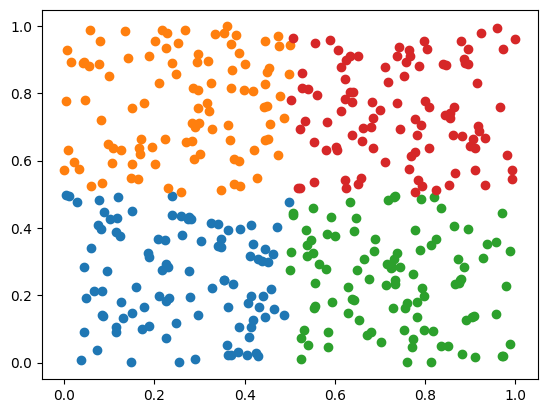

In [305]:
X = torch.zeros((800,2))

for i in range(100):
  X[i*8:(i+1)*8,:] = a.div(256.) + uniform.sample((8,2)).reshape((8,2))

X = rescale(X, 0, 1)


plt.scatter(X[::8, 0], X[::8, 1])
plt.scatter(X[1::8, 0], X[1::8, 1])
plt.scatter(X[2::8, 0], X[2::8, 1])
plt.scatter(X[3::8, 0], X[3::8, 1])

"""Y = torch.zeros((4000,2))

for i in range(1000):
  Y[i*4:(i+1)*4,:] = (y + uniform.sample((4,2)).reshape((4,2))).div(15.)

Y = rescale(Y, 0, 1)
plt.scatter(Y[::4, 0], Y[::4, 1])
plt.scatter(Y[1::4, 0], Y[1::4, 1])
plt.scatter(Y[2::4, 0], Y[2::4, 1])
plt.scatter(Y[3::4, 0], Y[3::4, 1])"""

In [259]:
torch.concat((x,x),0)[::4,:]

tensor([[10., 10.],
        [10., 10.]])

In [249]:
torch.tensor(x).div_(256.) + torch.rand_like(torch.tensor(x))

<ipython-input-249-abb3ec2367be>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x).div_(256.) + torch.rand_like(torch.tensor(x))


tensor([[0.2344, 0.8009],
        [0.9800, 0.2120],
        [0.9901, 0.8940],
        [0.4829, 0.6917]])